In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 1: Download and Load the data

In [46]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
df = pd.read_csv(url)

In [47]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
# checking the data for consistency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<font color = 'purple'>
Fortunately there aren't any missing values 
</font>

In [49]:
df[df.columns[-1]].value_counts().sort_values(ascending = True)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

<font color = 'orange'>
The last column had repeated values and upon further inspection, it is observed that the column is categorical. 
</font>

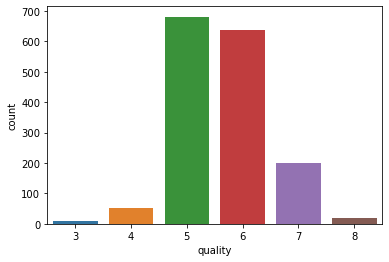

In [50]:
sns.countplot(x = df['quality'])
plt.show()

<font color = 'orange'>
    As apparent, from the histogram above there is a class imbalance and hence classifying the various ratings into a binary classification would simplify the learning process. As per the suggestion made in the problem description the all values above a rating of 5 (and inclusive) would be classified as good and the all values below 5 would be classified as bad
<font>

In [51]:
# Binarizing the dataset labels
df['quality'] = np.where(df['quality']<=5, 0, 1)

In [52]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

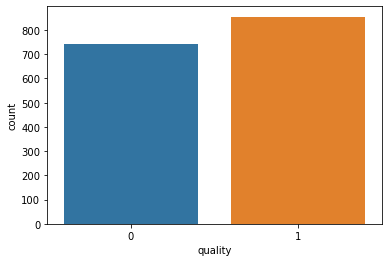

In [54]:
sns.countplot(x = df['quality'])
plt.show()

In [58]:
print('%bad quality : ',df['quality'].value_counts()[0]/len(df['quality']))
print('%good quality: ',df['quality'].value_counts()[1]/len(df['quality']))

%bad quality :  0.4652908067542214
%good quality:  0.5347091932457786


<font color = 'orange'>
    The percentage distribution of the bad quality and good quality wine after binarization to balance the classes results in nearly equal distributions of the data set and hence we can proceed with the new adjusted dataset
</font>

In [59]:
# Checking the new binarized dataset 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [62]:
#  Understanding the relation between the class label and the features
x = df.corr()
print(x['quality'].sort_values(ascending = False))

quality                 1.000000
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: quality, dtype: float64


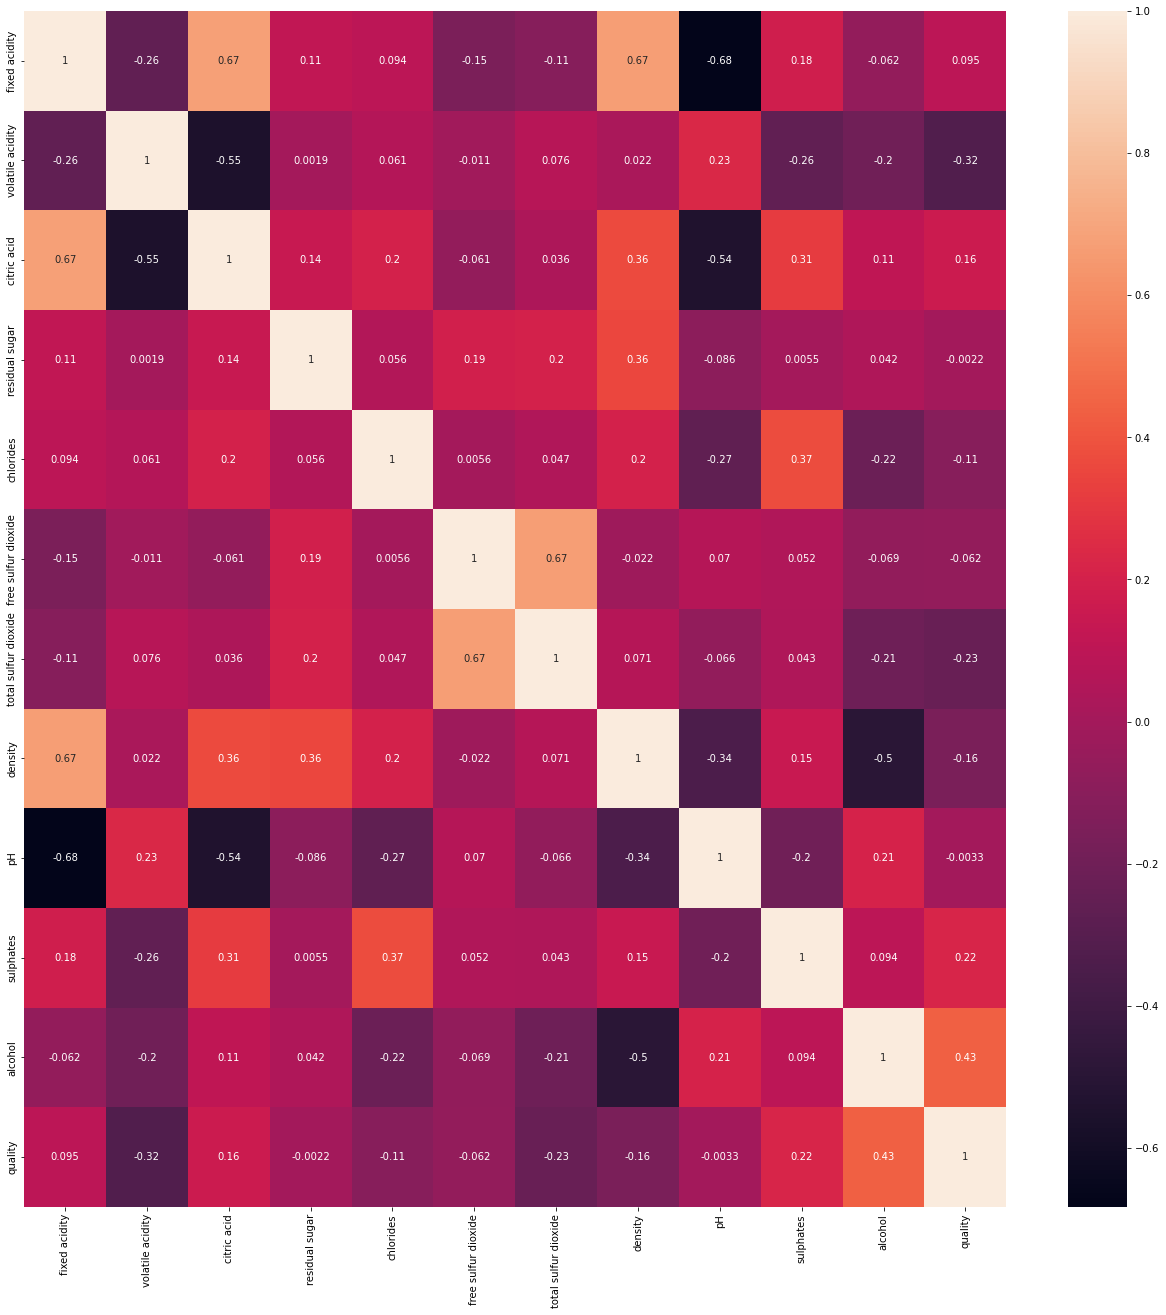

In [65]:
#visualizing the correlation between the features and label
plt.figure(figsize=(22,22))
sns.heatmap(x,annot=True)
plt.show()



<font color = 'grey'>

<font color = 'blue'>-'alchol'</font> and <font color = 'blue'>'volatile acidity'</font>  observantly have the strongest positive and negative correlations with 'quality' respectively. 
    <br><font color = 'dark blue'>-'sulphates'</font> and <font color = 'dark blue'>'total sulfur dioxide'</font> implying <u>higher the total sulfur dioxide, lower is the quality</u> 
    <br><font color = 'purple'>-'citric acid','density', 'fixed acidity','chlorides','free sulfur dioxide' </font> have weak a correlation while 
    <br><font color = 'purple'>-'residual sugar'</font> and <font color = purple>'pH'</font> have insignificant correlations.

</font>

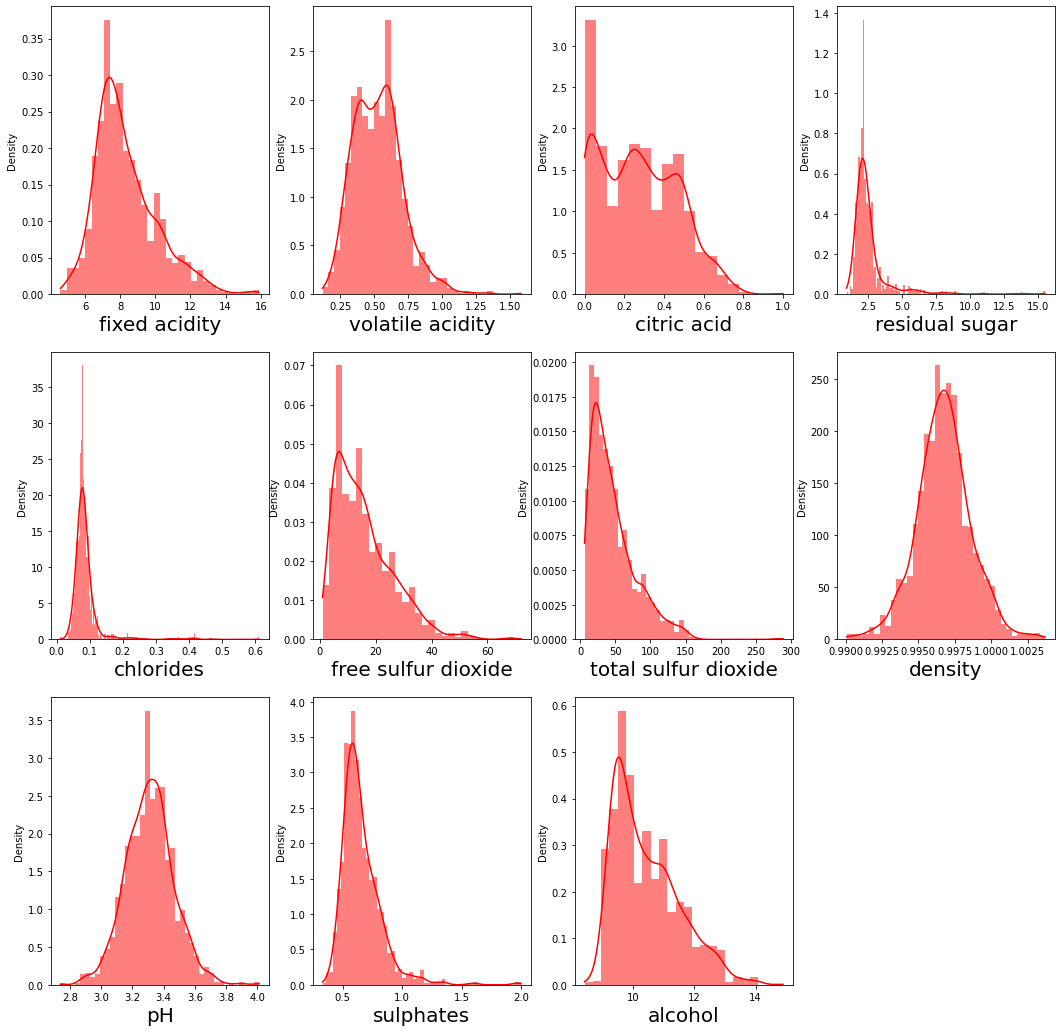

In [80]:
plt.figure(figsize=(18,18),facecolor='white')
subplt = 1
for col in df.columns[:-1]:
    plt.subplot(3,4,subplt)
    sns.histplot(x = df[col], color = 'red',kde=True, stat="density", linewidth=0)
    plt.xlabel(col,fontsize=20)
    subplt += 1
plt.show()



<font color = 'gray'>


'sulphates', 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide' ,'sulphates', 'alcohol' are all right skewed distributions.
</font>

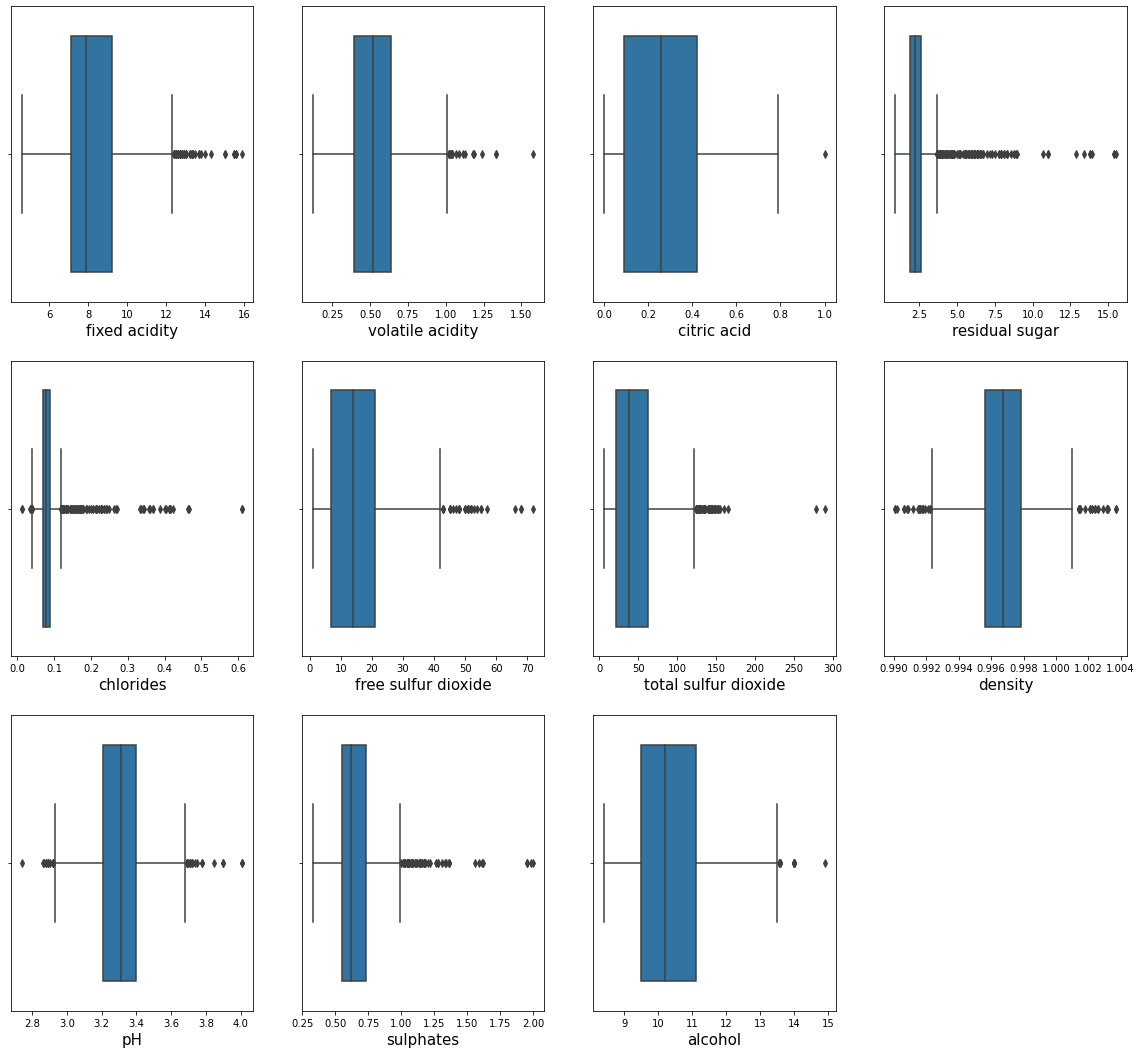

In [85]:
# Checking for outliers


plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.columns[:-1]:
    plt.subplot(4,4,plotnum)
    sns.boxplot(x = df[col])
    plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()



<font color = gray>
    

From the Boxplots it is evident that 'pH', 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide' ,'sulphates', 'alcohol','citric acid' have outliers present.

</font>